---------------------
# Project: Marketing Campaign Analysis
--------------------

In this project, we aim to analyze marketing data and address some important business problems/questions.

---------------------
## Context
--------------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data-driven decisions to optimize for ROI on conversion rates. It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates, and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth. 

---------------------
## Problem Statement
--------------------
Company 'All You Need' has hired you as a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the related data, understand the problem, and identify key insights and recommendations for the CMO to potentially implement.  

The data set marketing_data.csv consists of 2,240 customers of All You Need company with data on:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits

-------------------
## Data Dictionary
-------------------
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Importing libraries and overview of the dataset

In [2]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the dataset

In [3]:
campaign_data = pd.read_csv('marketing+data.csv')
campaign_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


### Check info of the dataset

In [4]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [5]:
#check for duplicate customers
campaign_data['ID'].nunique()

2240

All customer ID are unique. There are no duplicate customers

The dataset contains 2240 observations and 27 columns <br>
Of the columns we have 24 numeric and 3 objects  <br>
All campaign acceptance should be treated as binary values as it is either yes/no  <br>
There are some values missing from the dataset that would need to be treated

### Let's check the percentage of missing values for the Income column.

In [6]:
null_total = campaign_data.isnull().sum().sort_values(ascending = False)
percent = (campaign_data.isnull().sum()/campaign_data.count() * 100).round(3).sort_values(ascending = False)
pd.concat([null_total, percent], axis = 1, keys = ['Total', 'Percent'])

,Total,Percent
Income,24,1.083
ID,0,0.000
NumDealsPurchases,0,0.000
Complain,0,0.000
AcceptedCmp6,0,0.000
AcceptedCmp5,0,0.000
AcceptedCmp4,0,0.000
AcceptedCmp3,0,0.000
AcceptedCmp2,0,0.000
AcceptedCmp1,0,0.000


All columns have no missing values except income which as a total of 24 columns which makes up 1.083 percent of missing values

### Splitting the data into several data categories 

In [7]:
#Numerical data
campaign_num = campaign_data[['Year_Birth', 'Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']] 

In [8]:
#Binary data
campaign_binary = campaign_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']] 

### Find the summary statistics for numerical columns and write your observations. (use describe function).*

In [9]:
campaign_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


The minimum age of customers appears unlikely. From the time of this analysis that would make the customer 128 years old <br>
From the descriptive statistics we can see that income has a large standard deviation hence possible outliers <br>
The maximum number of children and teenagers for all customers is 2 <br>
The average number of days since last purchase for all customers is 49  <br>
It is observed that the top 75% of customers spend a lot more on wine than the remaining customers, same for fruits, meat, Fish and sweet products<br>
For gold products 75% of customers do not spent much on gold. Much of it's purchase comes from the top 25% of customers <br>
25% of customers are responsible for most of the deals made with discounts. The remaining 75% is quiet low <br>
On average the number of purchases made in store is the higher than purchases made through catalogs or through the website <br>
On average customers visit the company website 7 times a month <br>
The number of customer complains is low with the maximum number of complaints being 1

### Checking the categorical variables

In [10]:
#Looking into Education
campaign_data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The 2nd cycle degree is synonymous with a masters and a Basic degree is synonymous with graduation degree hence would be combined.

In [11]:
#replacing the values Basic with education and 2n cycle with masters
campaign_data['Education'].replace({'2n Cycle': 'Master'}, inplace=True)

In [12]:
campaign_data['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

Education now has 3 unique values <br>
Most of the customers have no higher than a graduation degree with a master's degree being the 2nd most occurring 


In [13]:
#looking into marital status
campaign_data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Married and Together both represent a couple and so will be combined <br>
YOLO, alone, and Absurd will all be combined into single <br>
Widow will be left along as it identifies a new variable. Same with divorced

In [14]:
campaign_data['Marital_Status'].replace({'Together':'Married', 'YOLO':'Single', 'Alone':'Single', 'Absurd':'Single' }, inplace=True)

In [15]:
campaign_data['Marital_Status'].value_counts()

Married     1444
Single       487
Divorced     232
Widow         77
Name: Marital_Status, dtype: int64

Marital Status column how has 3 unique values <br>
Most of the customers are married, making up roughly 65% of the total amount in Marital Statue <br>
Singles account for roughly 22% of the total amount <br>

In [16]:
#looking into countries
campaign_data['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

There are no duplicate countries

In [17]:
#String data
campaign_cat = campaign_data[['Education', 'Marital_Status', 'Country']]

### Write your observations on acceptance rate for each campaign given in the below plot.

Getting the total successes per campaign

In [18]:
total_converted = campaign_binary.sum().sort_values(ascending = False)
percent = ((total_converted/campaign_data['AcceptedCmp1'].count()) * 100).sort_values(ascending = False)
pd.concat([total_converted, percent], axis = 1, keys = ['Successes', 'Percentage'])

,Successes,Percentage
AcceptedCmp2,334,14.910714
AcceptedCmp5,167,7.455357
AcceptedCmp1,163,7.276786
AcceptedCmp3,163,7.276786
AcceptedCmp4,144,6.428571
AcceptedCmp6,30,1.339286


The most successful campaign is the campaign 2. Success rate of 14.9% <br>
The least successful campaign is the sixth campaign with only 30 successes and a percentage of 1.3%

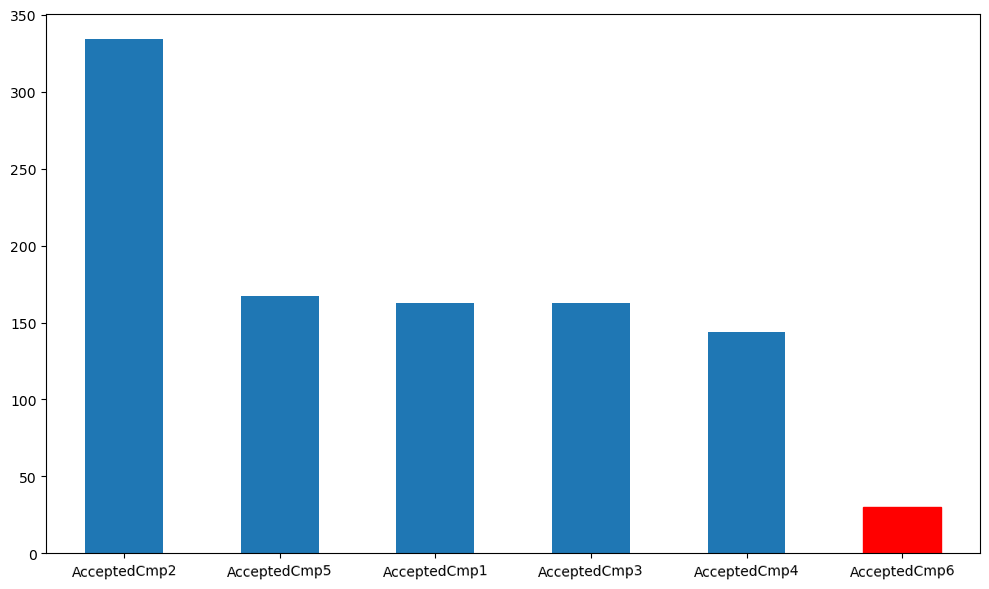

In [19]:
plt.figure(figsize=(10, 6))

bar_plot = campaign_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
      'AcceptedCmp6']].sum().sort_values(ascending=False).plot(kind='bar', rot=1)

bar_plot.patches[5].set_color('red')

plt.tight_layout()
plt.show()

**Observations:_______** <br>
Campaign 1, 3, and 5 have relatively the same success rate. Campaign 2 and campaign 6 being the extremes in terms of acceptance

## Treating outliers


In [20]:
#Year_Birth, Income, Recency, 
print(np.max(campaign_data['Year_Birth']),
np.min(campaign_data['Year_Birth']),
np.ptp(campaign_data['Year_Birth']))

1996 1893 103


<AxesSubplot:xlabel='Year_Birth'>

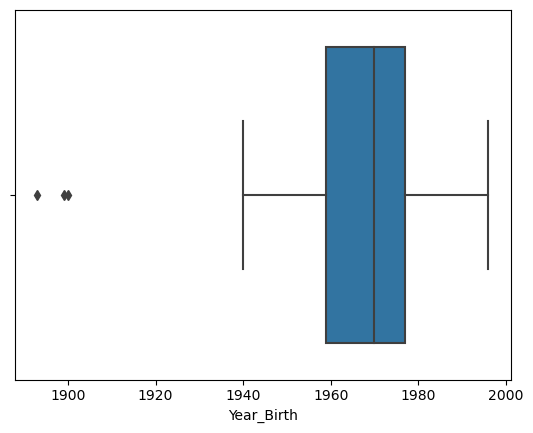

In [21]:
sns.boxplot(campaign_data['Year_Birth'])

Customer year of birth have some extreme values to the left of the box plot which affects its overall distribution. Furthermore, these years give an unrealistic age to the customer at the time of this analysis. For a more comprehensive analysis on customer age this will have to be treated.

In [22]:
#creating a copy of the data frame
campaign_df = campaign_data.copy()

# Creating an Age column

In [23]:
#creating an age column
current_date = 2021
campaign_df['Age'] = current_date - campaign_df['Year_Birth']
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,1,0,1,0,0,0,0,0,SP,51
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,5,0,1,0,0,0,1,0,CA,60
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,2,0,0,0,0,0,0,0,US,63
3,1386,1967,Graduation,Married,32474.0,1,1,0,10,0,...,7,0,0,0,0,0,0,0,AUS,54
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,7,1,1,0,0,0,0,0,SP,32


In [24]:
campaign_df['Age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

### checking the distribution of age

<AxesSubplot:xlabel='Age'>

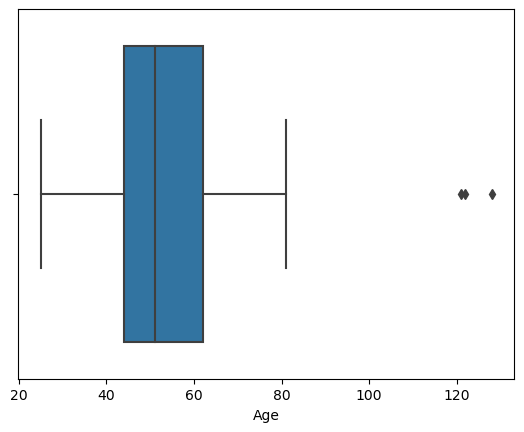

In [25]:
sns.boxplot(campaign_df['Age'])

In [26]:
#calculating the 25th and 75th quantile for age
q1 = campaign_df['Age'].quantile(0.25) 
q3 = campaign_df['Age'].quantile(0.75) 

#IQR
iqr = q3 - q1
iqr

n = 1.5

#upperlimit
upper = q3 + iqr*n

#lower limit
lower = q1 + iqr*n

print(f"Upper limit {upper} \nLower limit {lower}")

Upper limit 89.0 
Lower limit 71.0


In [27]:
#campaign_df[(campaign_df['Age'] < lower) | (campaign_df['Age'] > upper)]
#The minimum age is 25 so we are only interested in upper outliers
campaign_df[campaign_df['Age'] > upper][['Age']]

,Age
513,128
827,122
2233,121


Examining the Age column we can see that there are several unlikely ages for some customers, 3 to be exact, greater than 120 years old. This is likely due to an error. The ages will be limited to an appropriate value

<AxesSubplot:xlabel='Age', ylabel='Density'>

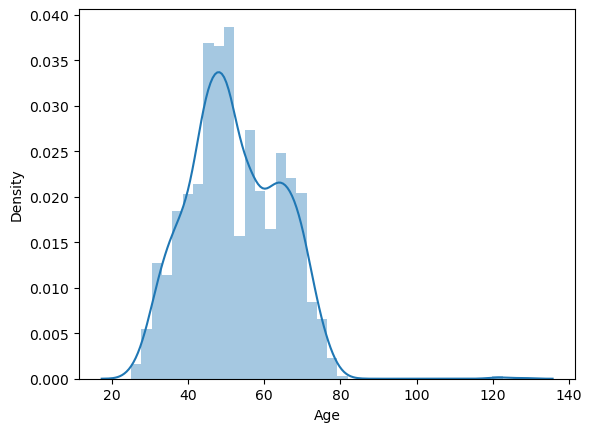

In [28]:
#checking distribution of ages before setting limitation
sns.distplot(campaign_df['Age'])

### Replacing Age outliers with the median


In [29]:
campaign_df.loc[campaign_df['Age'] > upper, 'Age'] = 51

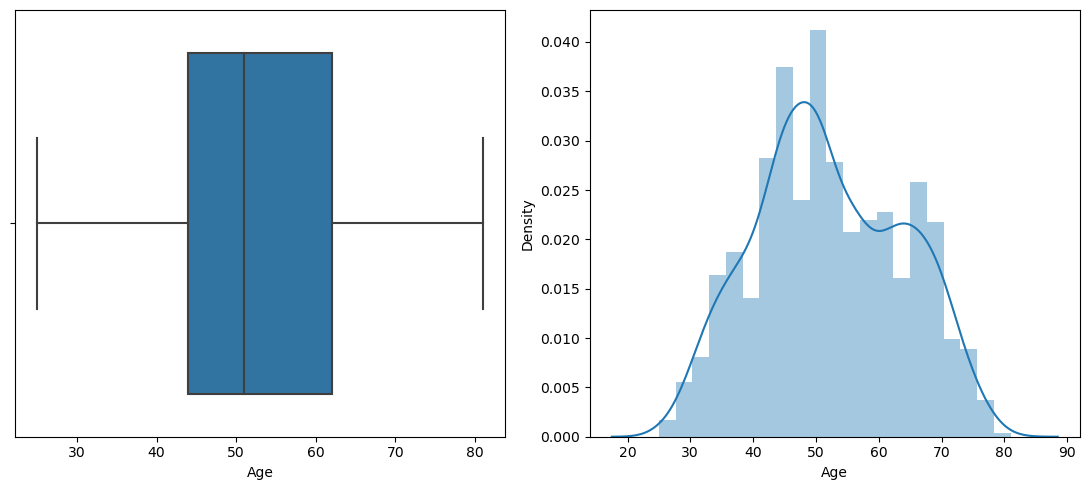

In [30]:
#creating function for plots
def plots(x):
    plt.figure(figsize=(11,5))
    ax = plt.subplot(1,2,1)
    sns.boxplot(x, ax = ax)

    ax = plt.subplot(1,2,2)
    sns.distplot(x, ax = ax)
    plt.tight_layout()

plots(campaign_df['Age'])

In [31]:
#Creating a total accepted campaign column
campaign_df['Total Campaigns Accepted'] = campaign_df.iloc[:, 19:24].sum(axis = 1)
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Age,Total Campaigns Accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,0,0,0,0,SP,51,1
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,1,0,0,0,1,0,CA,60,1
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,0,0,0,US,63,0
3,1386,1967,Graduation,Married,32474.0,1,1,0,10,0,...,0,0,0,0,0,0,0,AUS,54,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,1,1,0,0,0,0,0,SP,32,2


### The outliers in column Age has now been treated and we can observe that it's distribution is relatively unchanged

# Income outliers

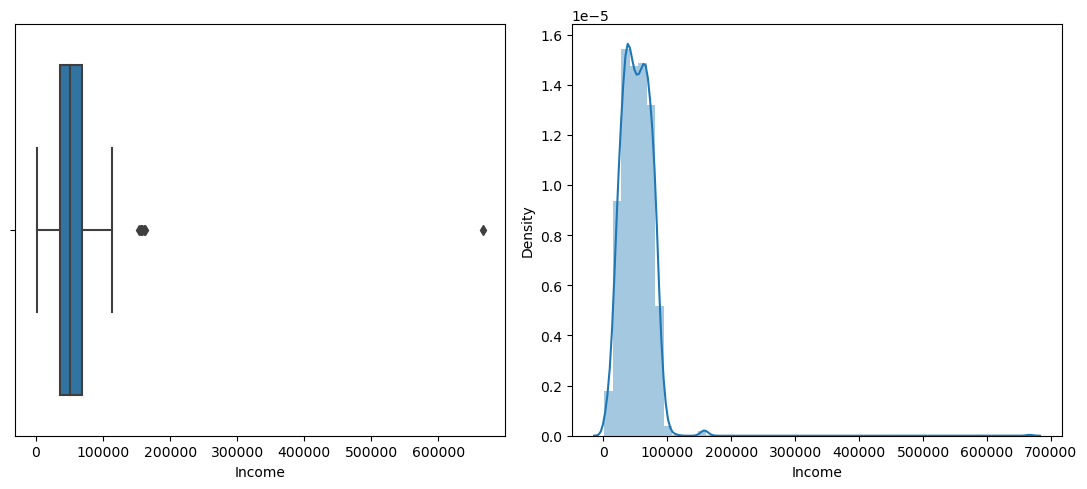

In [32]:
#plotting the income columns
plots(campaign_df['Income'])

As can be observed above, the Income column has several outliers that affect its distribution. Its outliers are to the right of the distribution meaning that there are some customers who earned a lot more than the other customer. <br>
Unlike age these outliers would not be removed but treated differently

In [33]:
#calculating the IQR
upper_income = campaign_df['Income'].quantile(0.75)
lower_income = campaign_df['Income'].quantile(0.25)

income_iqr = upper_income - lower_income

#income outliers above the limit of the boxplot upper whisker
campaign_df[campaign_df['Income'] > upper_income][['Income']].sort_values(by = 'Income', ascending = True)

,Income
1010,68627.0
2155,68655.0
2154,68655.0
128,68657.0
1279,68682.0
...,...
2204,157243.0
853,157733.0
497,160803.0
731,162397.0


The Income column has over 552 outliers with a minimum outlier value of 68627 and a maximum value of 666666. Unlike in the Age column these values would not be changed but will be **placed and observed separately**

In [34]:
#segmenting the income column
income_outliers = campaign_df[campaign_df['Income'] > upper_income]
income_nonoutliers = campaign_df[campaign_df['Income'] < upper_income]

### checking the distribution of the Income subset with no outliers

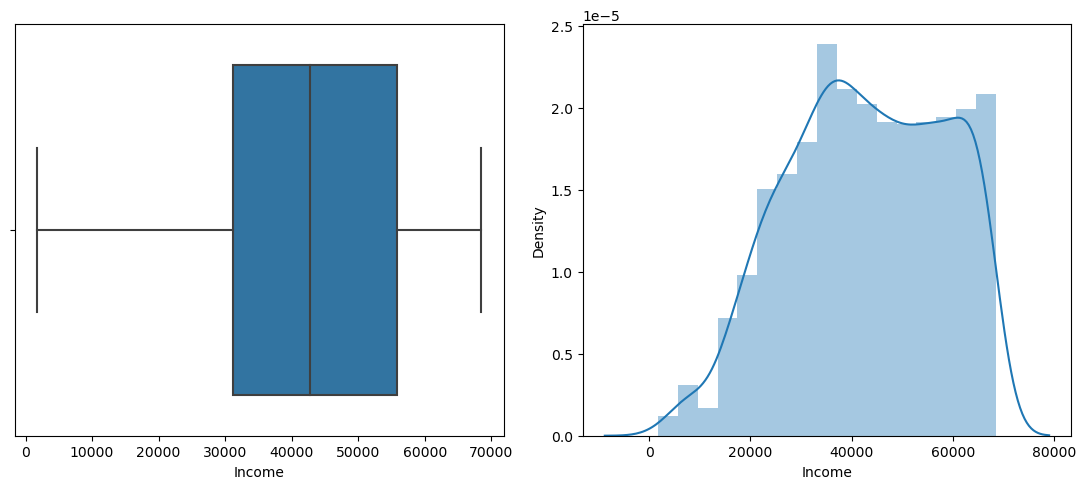

In [35]:
plots(income_nonoutliers['Income'])

### checking the distribution  of outliers values in Income

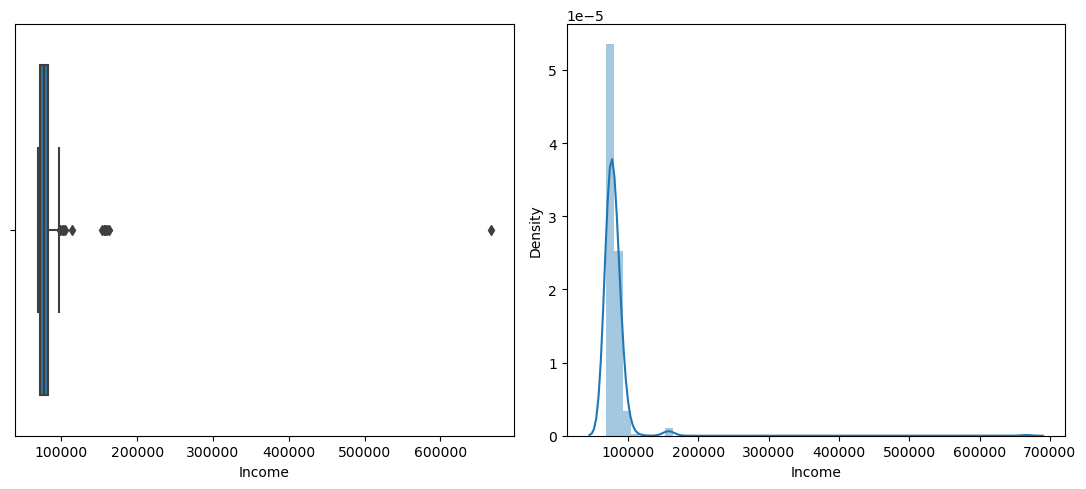

In [36]:
plots(income_outliers['Income'])

In [37]:
income_outliers['Income'].describe()

count       554.000000
mean      80580.895307
std       27427.419849
min       68627.000000
25%       72380.500000
50%       77805.500000
75%       82648.500000
max      666666.000000
Name: Income, dtype: float64

The income data has now been split into non outliers and outliers. As observed by the income outliers plots they showcase only extreme values

In [38]:
#Grouping all campaigns together
columns = ['Income', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

income_nonoutliers = income_nonoutliers[columns]
income_outliers =  income_outliers[columns]
#income_outliers.head()

In [39]:
#Getting the total campaigns accepted for both outliers and nonoutliers Income
income_nonoutliers['Total Campaigns Accepted'] = income_nonoutliers.iloc[:, 1:7].sum(axis = 1)
income_outliers['Total Campaigns Accepted'] = income_outliers.iloc[:, 1:7].sum(axis = 1)
#income_outliers['Total Campaigns Accepted']

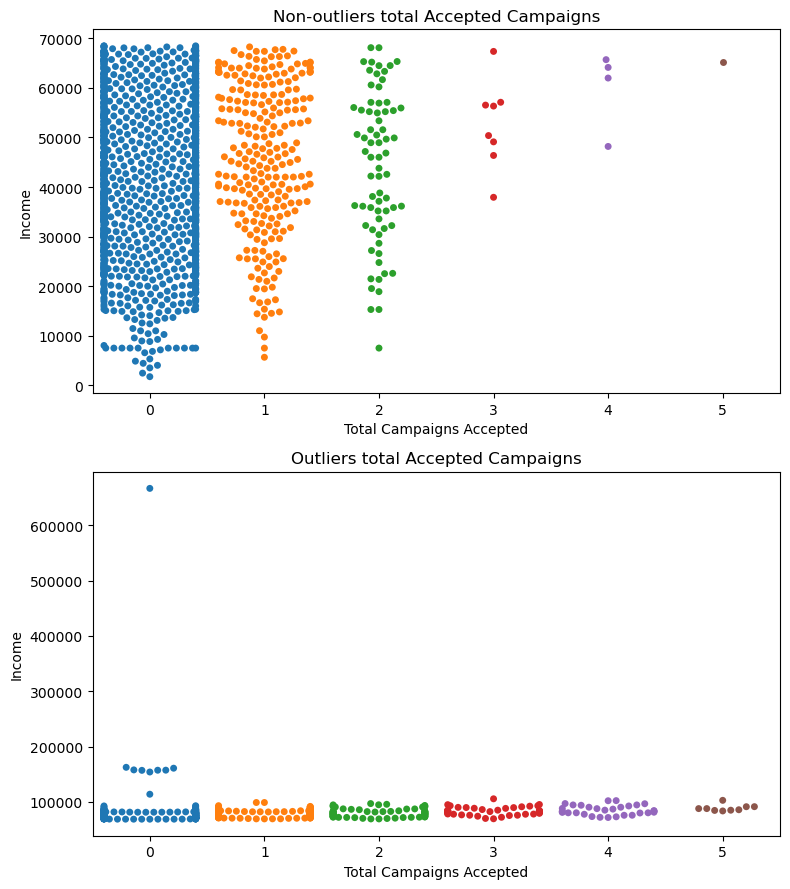

In [40]:
#visualizing the total accepted campaigns by income outliers and non outliers
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))
sns.swarmplot(x='Total Campaigns Accepted', y='Income', data=income_nonoutliers, ax = axes[0])

sns.swarmplot(x='Total Campaigns Accepted', y='Income', data=income_outliers, ax=axes[1])

axes[0].set_title('Non-outliers total Accepted Campaigns')
axes[1].set_title('Outliers total Accepted Campaigns')

plt.tight_layout()

### Observations on acceptance rate for each campaign according to the income level.

### Non Outliers 
Across all incomes with no outliers the total number of campaigns accepted is 1 <br>
The acceptance rate for a total of 2 campaigns is low and this acceptance come for customers with income values ranging roughly from 40,000 to 70,000 <br>
For a total acceptance rate of 3 the count is lower still and it is observed that this acceptance comes from customer with a range income of roughly 40,000 to 70,000 ~ same as the total acceptance for 2 campaigns <br>
For an acceptance rate of 4 is drops even more and once again it can be that this acceptance come from customers with a higher income in this category. <br>
<br>

### Outliers
For the outliers categories it can be observed that customers with an income range of roughly 100,000 have a positive acceptance rate for campaign 1, 2, 3, and 4 <br>
Campaign 5 has a low acceptance rate and there are no customer with a total acceptance rate of 6 <br>
It can also be observed that for the customer with an income of over 200,000 there was no acceptance to any of the campaigns captured for them

## combining columns to have a closer look at customers who accepted 3 campaigns and above

In [41]:
#getting the total amount spent by customers on products
total_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaign_df['Total Spent'] = campaign_df[total_spent].iloc[:, 0:7].sum(axis = 1)
#campaign_df.head()

In [42]:
#Total children
total_childern = ['Kidhome', 'Teenhome']
campaign_df['Total Children'] = campaign_df[total_childern].iloc[:, 0:2].sum(axis=1)
#campaign_df.head()

In [43]:
#campaign_df['Total Children'].describe()

In [44]:
#Getting the total number of purchases made
total_purchases_made = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campaign_df['Total Purchases'] =campaign_df[total_purchases_made].iloc[:, 0:3].sum(axis = 1)
#campaign_df.head()

In [45]:
campaigning = campaign_df[campaign_df['Total Campaigns Accepted'] >= 3]
campaigning['Income'].describe()

count        92.000000
mean      81418.597826
std       11952.600614
min       37929.000000
25%       76253.250000
50%       82692.000000
75%       88708.000000
max      105471.000000
Name: Income, dtype: float64

- There are a total of 92 customers who accepted at least 3 campaigns

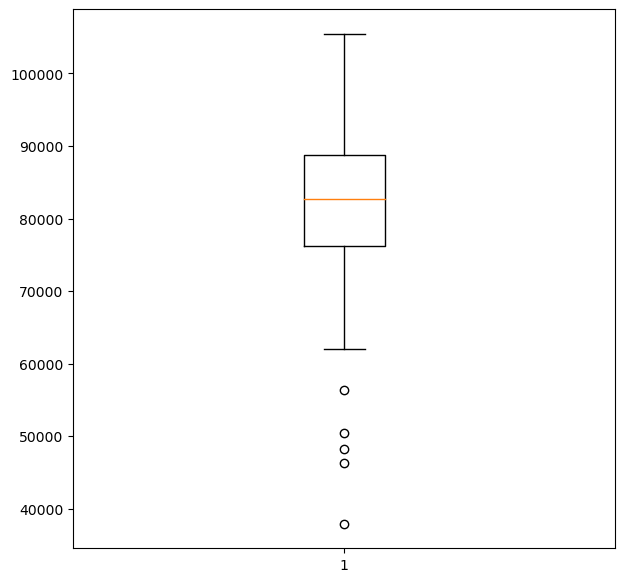

In [46]:
#what are their income levels, education level how many children do they have, recency, spending habits
plt.figure(figsize=(7,7))

data = campaigning['Income']

plt.boxplot(data)
plt.show()

- Customers who accepted at least 3 campaigns appear to have a higher salary and therefore can afford to spend more. The maximum salary amongst these customers are 105471 and the minimum is 37929. Which gives us a range income of 67542

### Checking education level amongst customers who accepted at least 3 campaigns

<AxesSubplot:xlabel='Education', ylabel='count'>

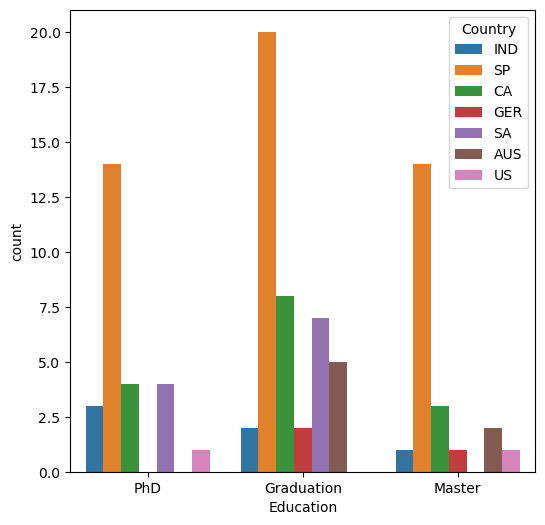

In [47]:
#what are their income levels, education level how many children do they have, recency, spending habits

plt.figure(figsize=(6,6))
sns.countplot(data = campaigning, x = 'Education', hue = 'Country')

- It appears the highest education level for the customers who accepted at least 3 campaigns is the graduation degree and of the countries where the campaigns were run Spain appear to be the most successful, followed by Canada and then Saudi Arabia <br>

- The campaign did not perform so well outside of these 3 countries

## Customer who accepted less than 3 campaigns

In [48]:
low_accept = campaign_df[campaign_df['Total Campaigns Accepted'] < 3]

### Observations on average amount spent on different products across all campaigns. 

In [49]:
cam_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

In [50]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(campaign_df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(campaign_df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(campaign_df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(campaign_df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(campaign_df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(campaign_df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([cam_columns]).plot(kind='line', figsize=(9,8), rot = 1)
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

#### Use the function defined above to generate line plots for different purchasing Products

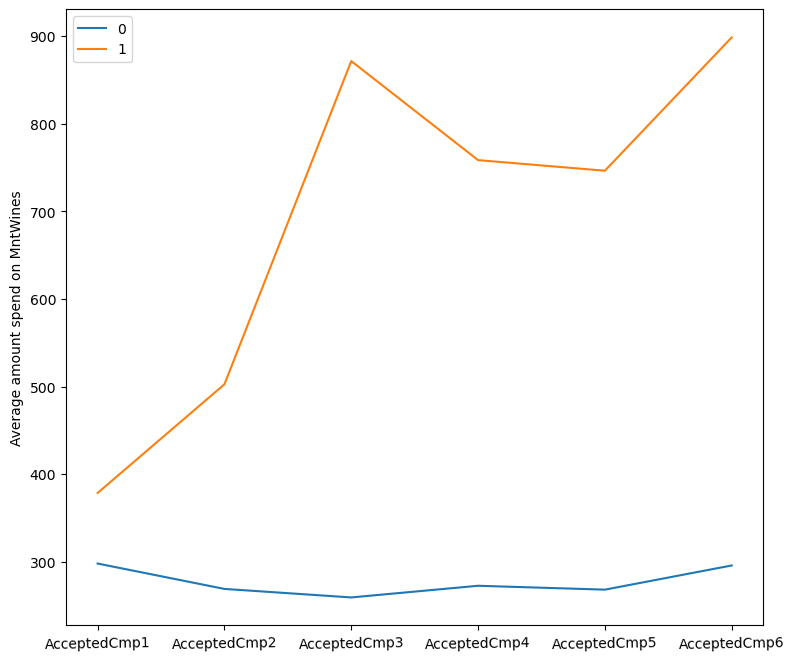

In [51]:
amount_per_campaign('MntWines')

- Generally the average amount spent on wine shows a positive trend. It picks up at campaign 2 and reaches a relative peak at campaign 3. Its position in campaign 4 and 5 is quite high and at campaign 6 it peaks

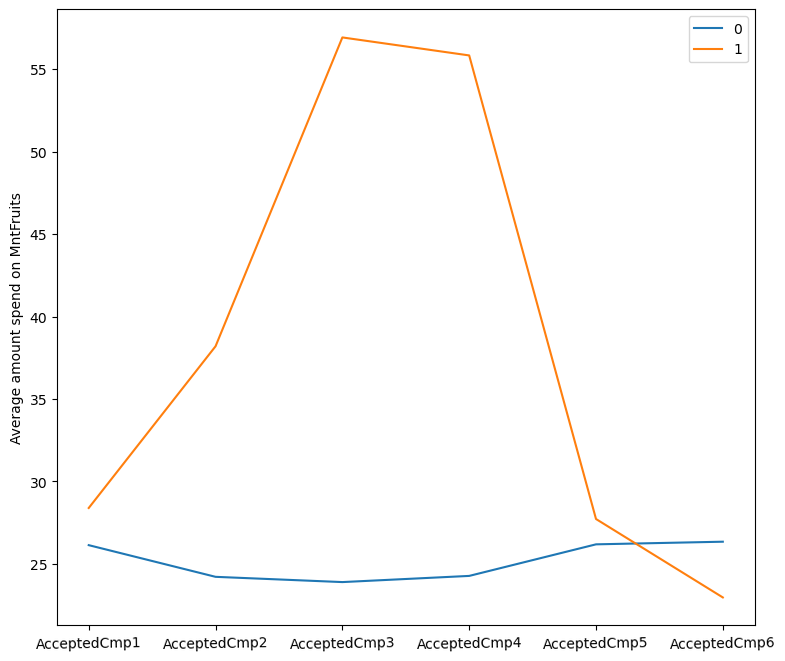

In [52]:
amount_per_campaign('MntFruits')

- Overall, the average amounts spent on fruits is low. It peaks at campaign 3 and maintains it's relative position until campaign 4 before going on a downward trend all through campaign 5 and 6

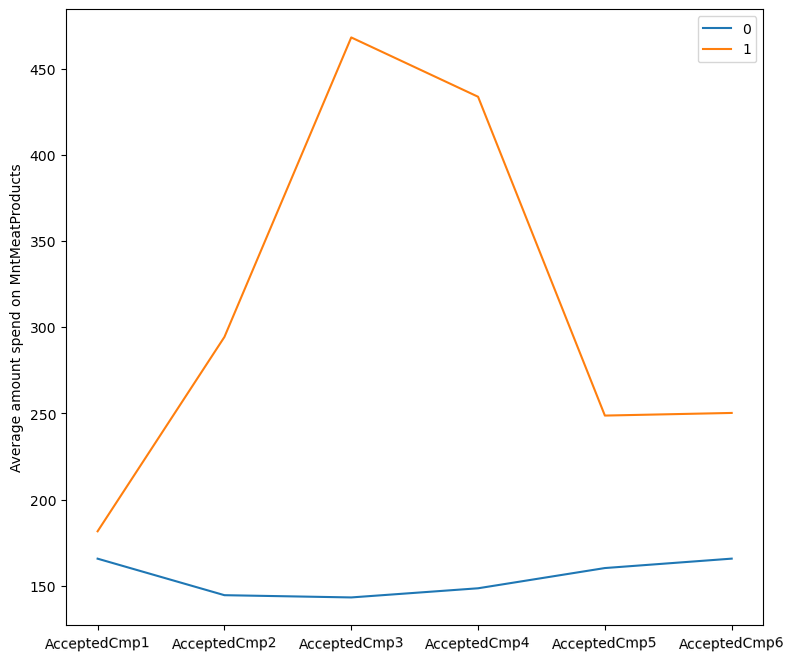

In [53]:
amount_per_campaign('MntMeatProducts')

- The highest average amount spent on meat products is in campaign 3, and it performed relatively well in campaign 4 however in campaign 1, 2, 5, and 6 the average amount spent on meat products was low

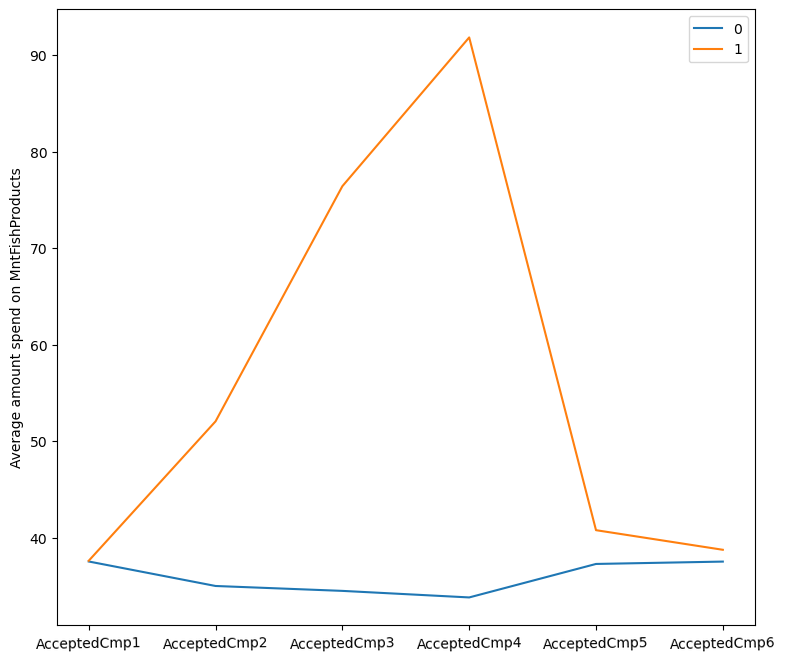

In [54]:
amount_per_campaign('MntFishProducts')

- Of all the campaigns, the average amount spent on fish products was most in campaign 4. However it should be noted that it's overall performance isn't very good

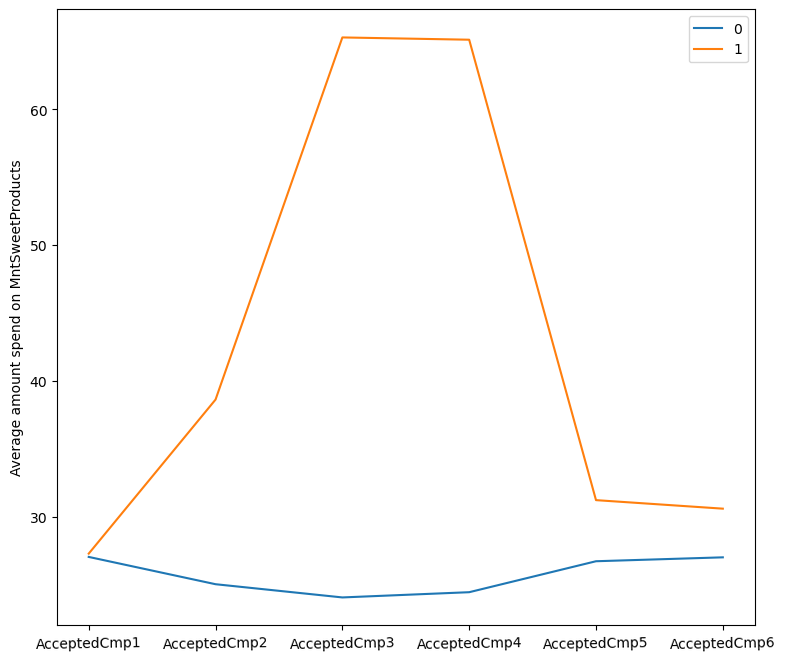

In [55]:
amount_per_campaign('MntSweetProducts')

- For sweet products the average spent was peak in campaign 3 and 4 and low in campaign 1, 2, 5, and 6. It should be noted that its overall performance is not very good

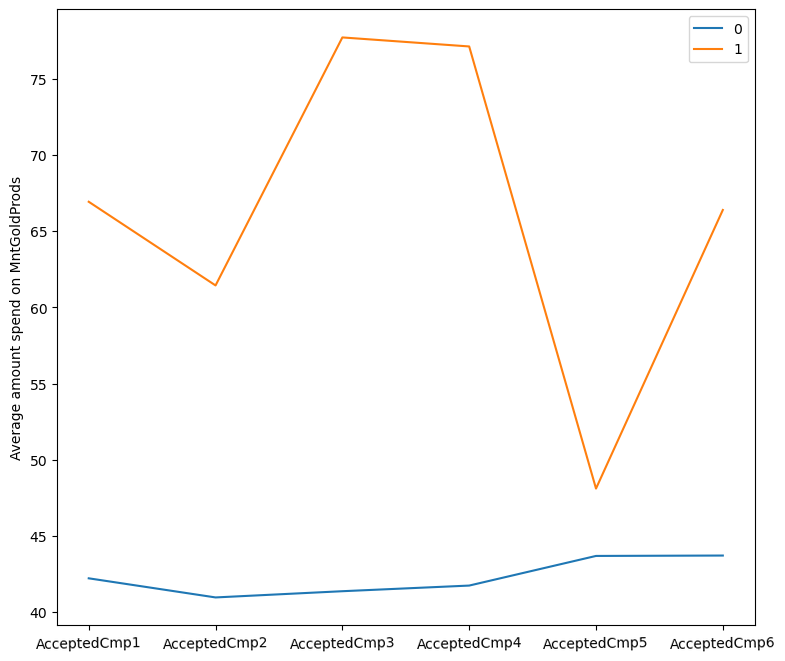

In [56]:
amount_per_campaign('MntGoldProds')

- Gold product saw its peak average amount spent on it in campaign 3 and campaign 4. It performed relatively well in campaign 1, 2 and 6 and poorly in campaign 5

## overall spent on all products

Text(0, 0.5, 'Total spent')

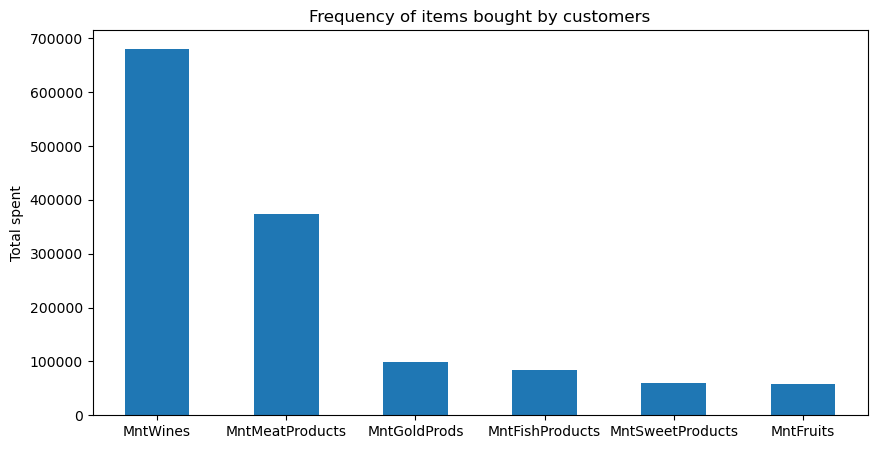

In [57]:
plt.figure(figsize=(10,5))
total_spendings = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] 
total_spendings = campaign_df[total_spendings].iloc[:, 0:7].sum(axis = 0)
total_spendings.sort_values(ascending = False).plot(kind='bar', rot = 0)

plt.title('Frequency of items bought by customers')
plt.ylabel('Total spent')

- The frequency of products bought by customers in the past 2 years is highest for wines and followed by meat 

**Observations:__________**

### Observations on average number of purchases from different channels across all campaigns. 

#### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [58]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(campaign_df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(campaign_df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(campaign_df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(campaign_df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(campaign_df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(campaign_df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([cam_columns]).plot(kind='line', figsize=(8,8)) 
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

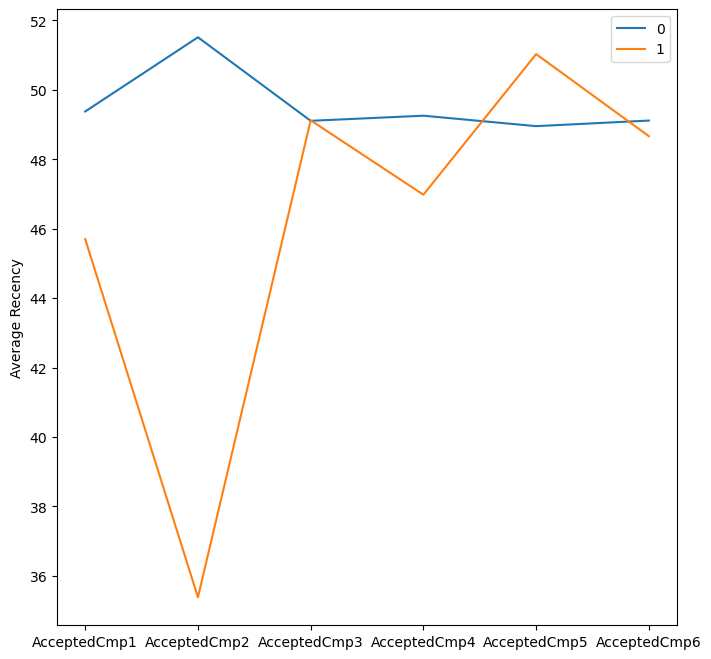

In [59]:
Purchases_per_campaign('Recency')

- Average recency of the customers who accepted campaign 2 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item. 

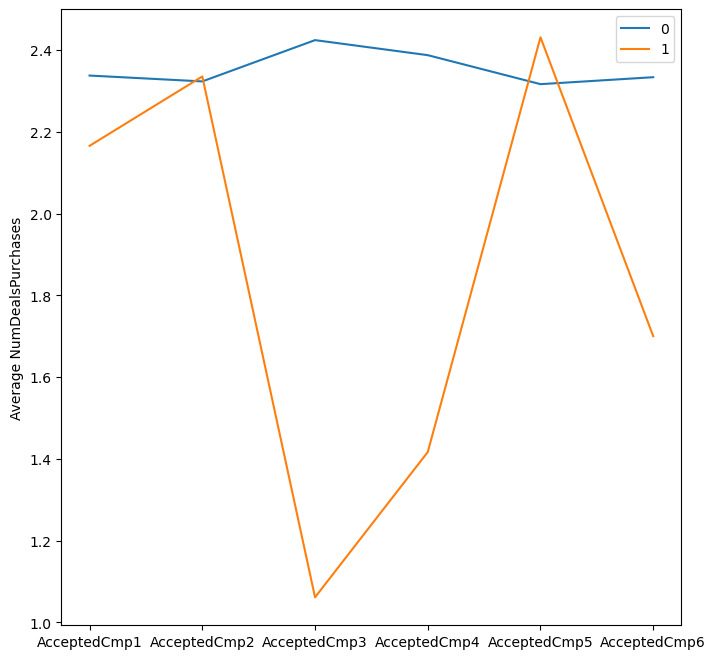

In [60]:
#here is an example showing how to use this fuction on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- For the customers accepting campaign 3, 4, and 6 the average discount purchases is quite low.

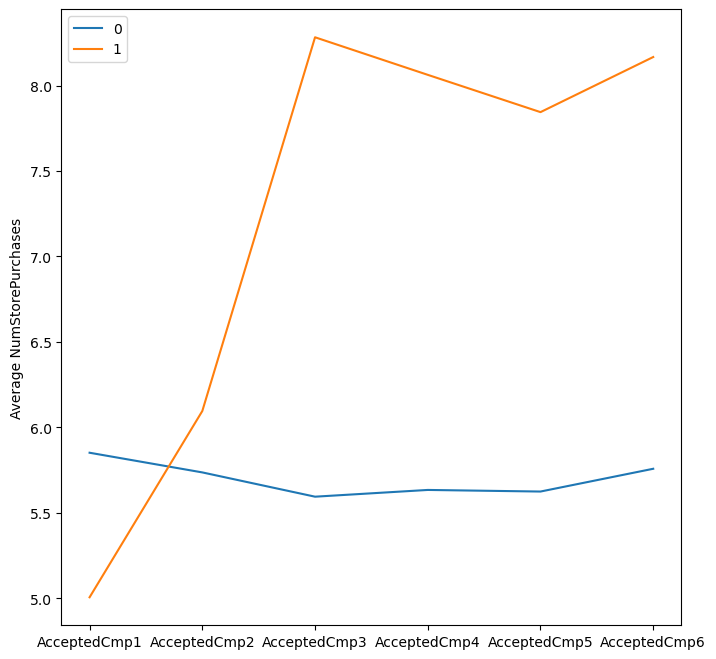

In [61]:
Purchases_per_campaign( 'NumStorePurchases')

- For customers accepting campaign 1, and 2, the average purchase made in store is low. We can see a much higher average in-store purchase for campaign 3, 4, 5 and 6

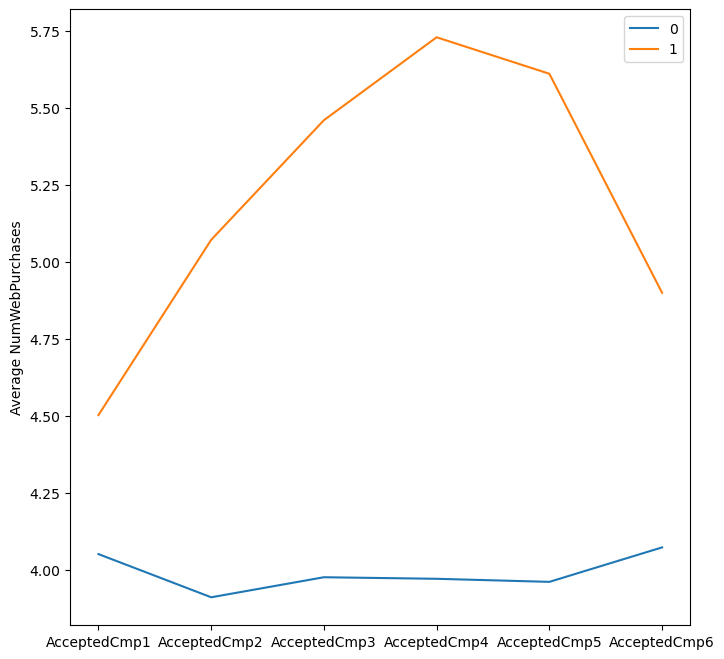

In [62]:
Purchases_per_campaign( 'NumWebPurchases')

- Average web purchase increased with each campaign and peaked at campaign 4. At campaign 5 and 6 the average purchases made via web have appeared to slow down 

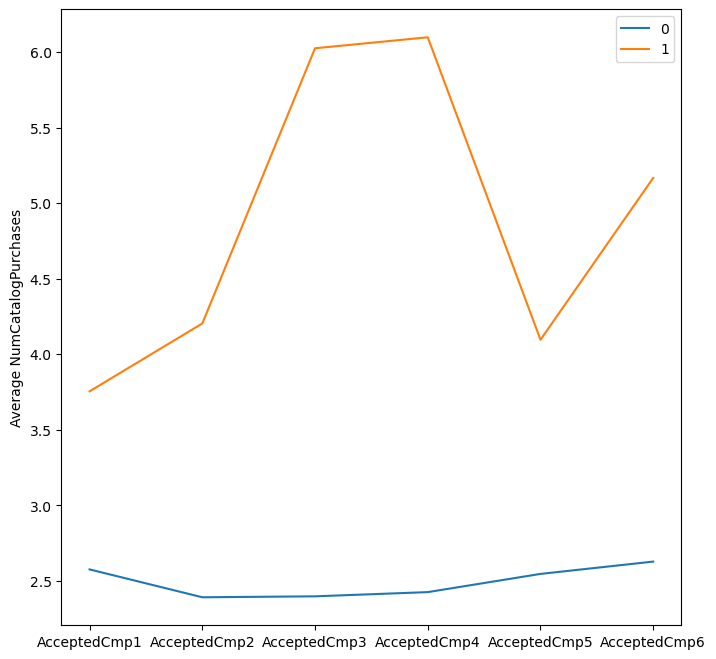

In [63]:
Purchases_per_campaign( 'NumCatalogPurchases')

Catalog average purchases where highest at campaign 3 and 4. For campaign 1, 2, and 5 the purchases were low. At campaign 6 the average purchases began to pick up again

### Observations on percentage acceptance for different categorical variables across all campaigns. 

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [64]:
df = campaign_df

In [65]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1']) 
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    e6=(df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

In [66]:
pd.DataFrame(df.groupby('Education')['AcceptedCmp2'].sum()/df.groupby('Education')['AcceptedCmp2'].count())

,AcceptedCmp2
Education,
Basic,0.037037
Graduation,0.134871
Master,0.137871
PhD,0.207819


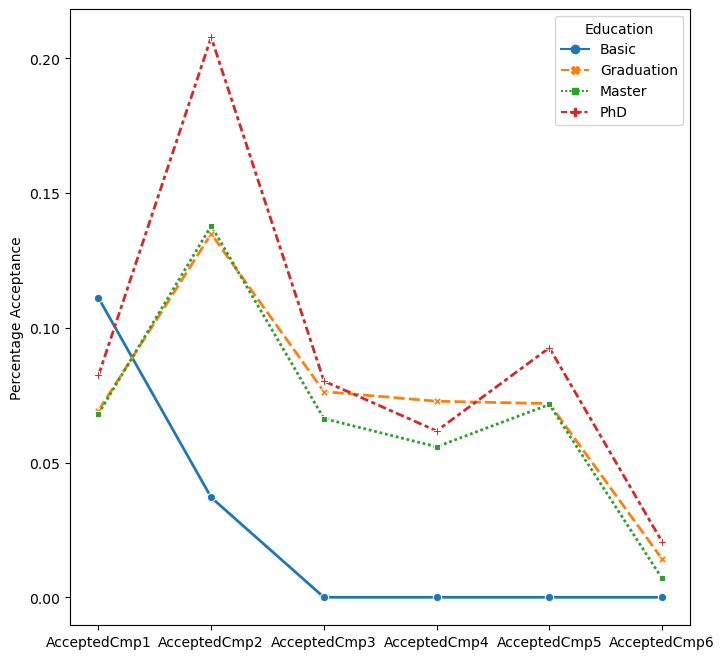

In [67]:
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D have accepted campaign 2.
- Customers with basic education have only accepted campaign 1 and 2.
- Except customers with basic education level, all education levels follow the same trend.

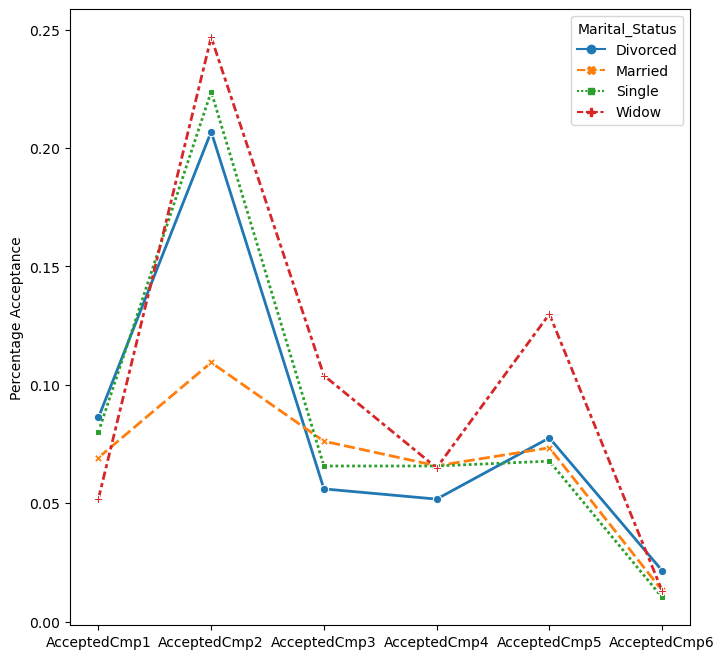

In [68]:
Cat_Campaign_Relation(df, 'Marital_Status')

- Roughly 25% of customers who are widows accepted campaign 2. We can see similar acceptance rate for single, and divorced customers who all show above 20% acceptance rate for campaign 2 
- Married couples however did not follow the same trend as the others and has a low acceptance for all campaigns

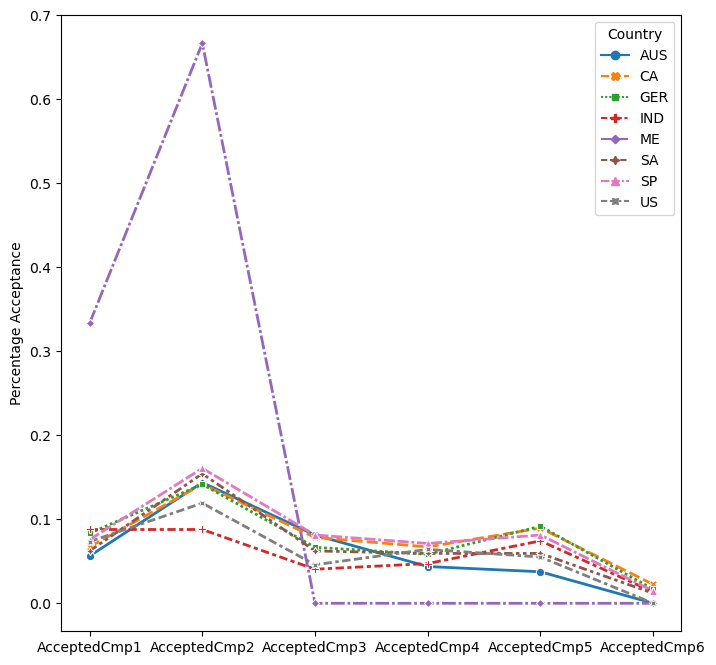

In [69]:
Cat_Campaign_Relation(df, 'Country')

Montenegro has an acceptance rate of more than 30% for campaign 1 and close to 70% acceptance for campaign 2 <br>
Every other country follows a similar trend of acceptance peaking at campaign 2 with an acceptance rate of roughly 15%

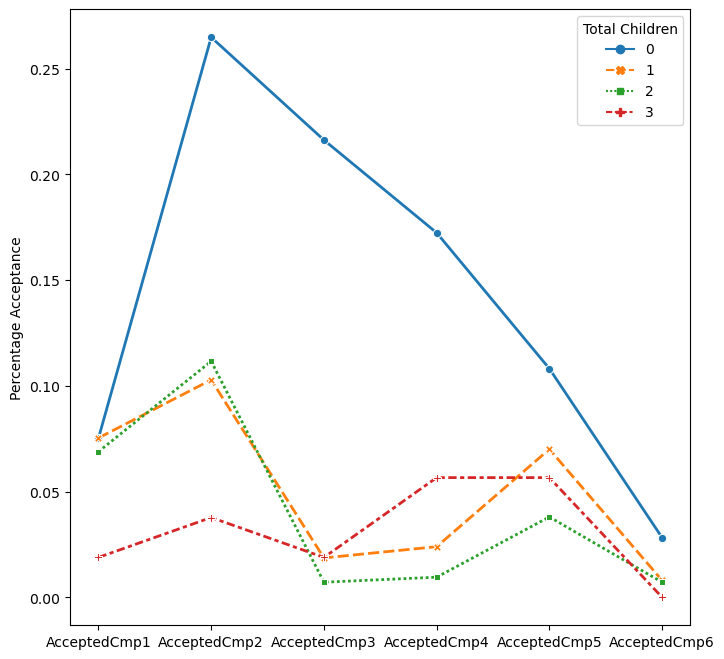

In [70]:
Cat_Campaign_Relation(df, 'Total Children')

- Campaign 2 did very well among customer with no children
- The acceptance rate for customer with 1 and 2 children is just above 10% for campaign 2. <br>
- For customers with 3 children the acceptance rate is roughly estimated around 7% for campaign 4 and 5

<AxesSubplot:ylabel='Country'>

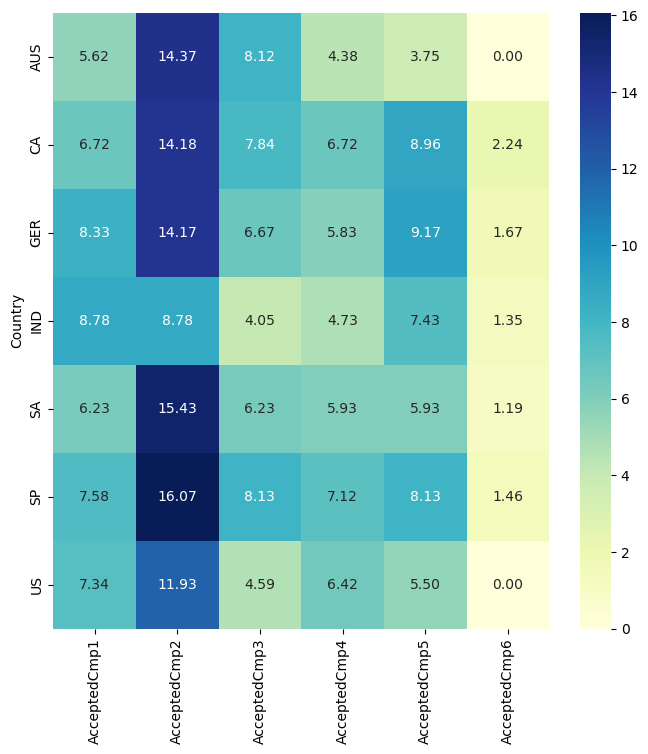

In [71]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[cam_columns]/df_not_mexico.groupby('Country').count()[cam_columns])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

- Campaign 6 is the least performing campaign  across all countries
- Campaign 1 has its highest acceptance in India and Germany with an acceptance rate of 8.78% and 8.33% respectively
- Campaign 2 has the highest acceptance across all countries with a 16% acceptance rate in Spain
- Campaign 3 did especially poor in India and the United States with a percentage acceptance rate of 4.05% and 4.50% respectively
- Campaign 4 has it highest acceptance rate in Spain, Canada, and the United States with 7.12%, 6.72% and 6.42% respectively
- Campaign 5 has its highest acceptance in Germany, Canada, and Spain with acceptance rates of 9.17, 8.96 and 8.13 respectively 
- Campaign 6 did not perform well in any of the countries


### Observations on percentage amount spent on different products for each category of the mentioned categorical variables.

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [72]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0).sort_values(ascending=False)
#spending

In [73]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total Spent']) 
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

## Testing

In [74]:
df['Total Spent'].head()

0    1190
1     577
2     251
3      11
4      91
Name: Total Spent, dtype: int64

In [75]:
(df.groupby('Education').sum()[mnt_cols]).T/df.groupby('Education').sum()['Total Spent']

Education,Basic,Graduation,Master,PhD
MntWines,0.088522,0.458573,0.499670,0.601562
MntFruits,0.135839,0.049645,0.042457,0.029817
MntMeatProducts,0.139914,0.289545,0.272425,0.250744
MntFishProducts,0.208513,0.069608,0.065767,0.039750
MntSweetProducts,0.148064,0.050601,0.045202,0.030074
MntGoldProds,0.279149,0.082028,0.074479,0.048052


In [76]:
df.groupby('Education').sum()['Total Spent']

Education
Basic           4417
Graduation    698626
Master        327154
PhD           326791
Name: Total Spent, dtype: int64

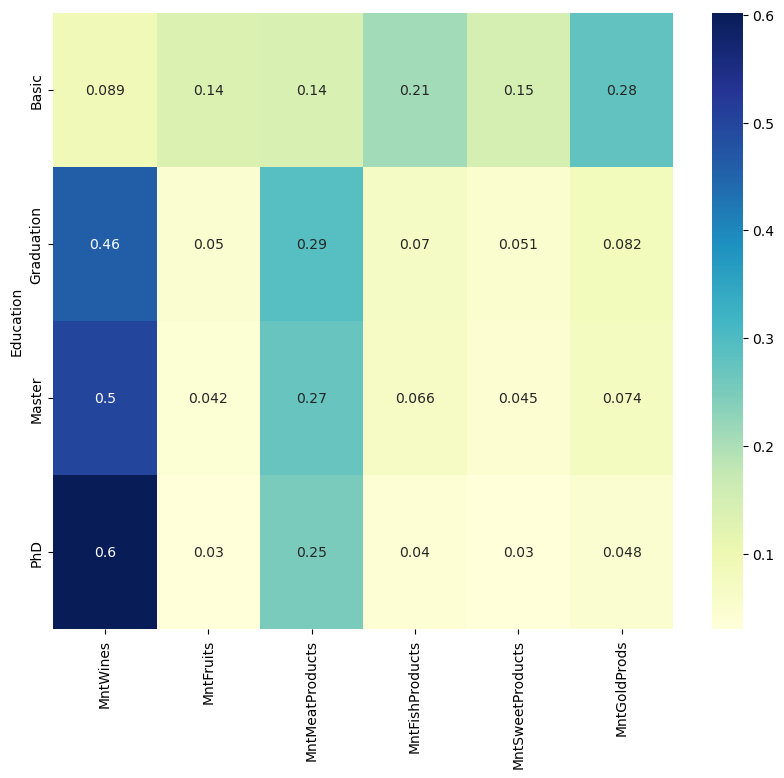

In [77]:
# plot showing the percentage of total spending of different products by a group of customers having same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with PhD spend ~25% of their total spending on meat.
- Customers having education level Master or PhD spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

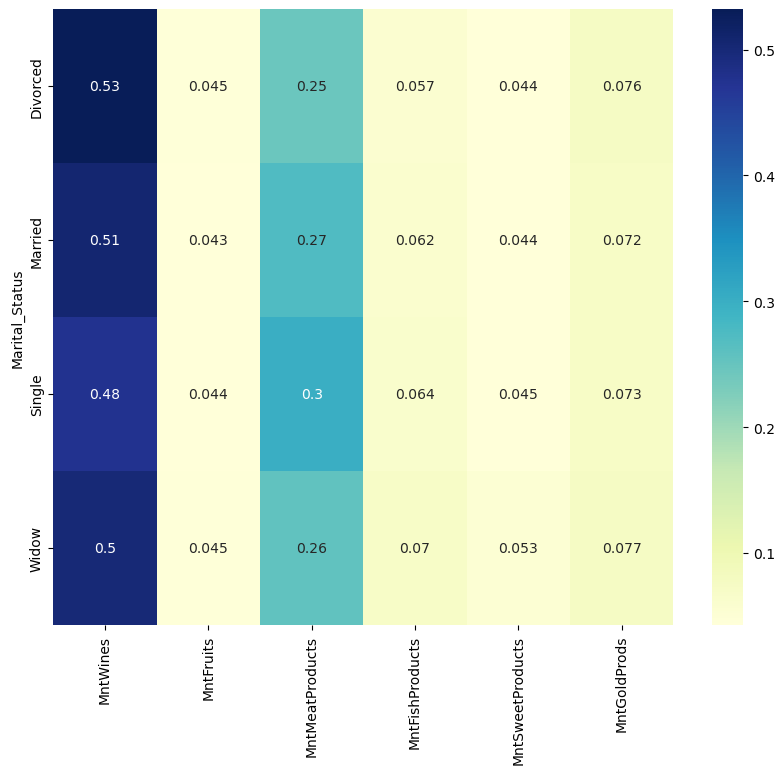

In [78]:
amount_per_category(df, 'Marital_Status')

**Observations:__________**
- Divorced customers, single, married and widowed customers spend ~50% of their total spending on wine
- All customers spend ~30% of their total spending on meat products
- Widowed married and divorces customer spend ~25% of their total spending on meat products
- Single and married customers spend ~18% of their total spending on fish, sweet and gold products

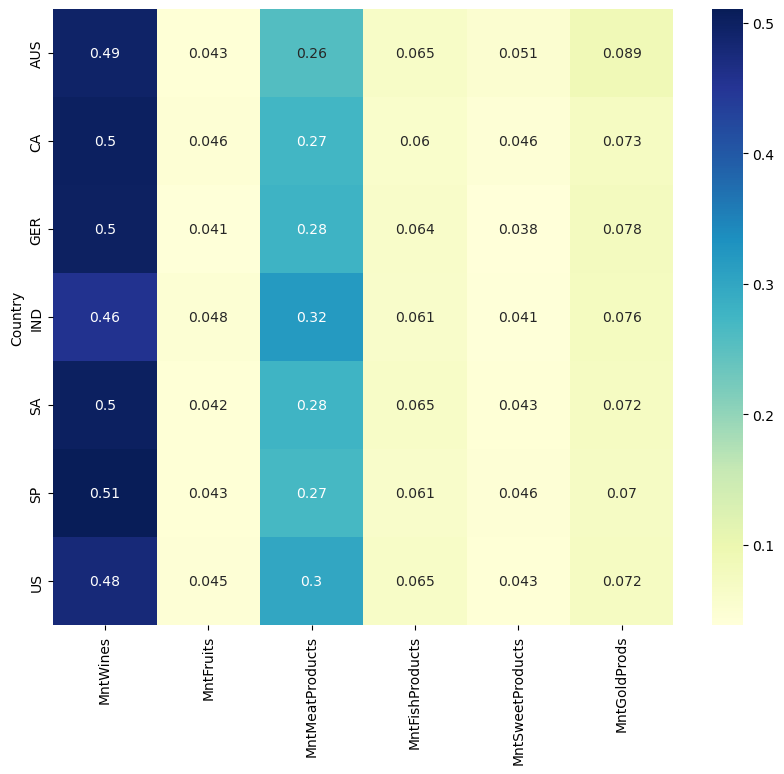

In [79]:
amount_per_category(df_not_mexico, 'Country')

- Customers from all countries spend ~50% of their total spending on wine products
- Customers from all countries spend ~30% of their total spending on meat products
- Customers from all countries spend ~18% of their total spendings on fish, sweet and gold products

### Check different channel performances 

Let's calculate the percentage of purchases for all the channels.

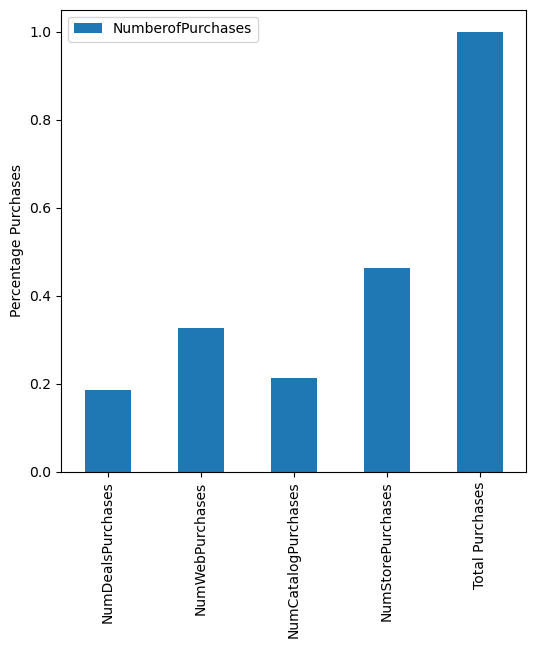

In [80]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df['Total Purchases'].sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

### Observations on percentage purchases from different channels for different categories of the income_cat column.

Let's check how number of purchases via different channels varies for different income bins.

In [81]:
#Binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

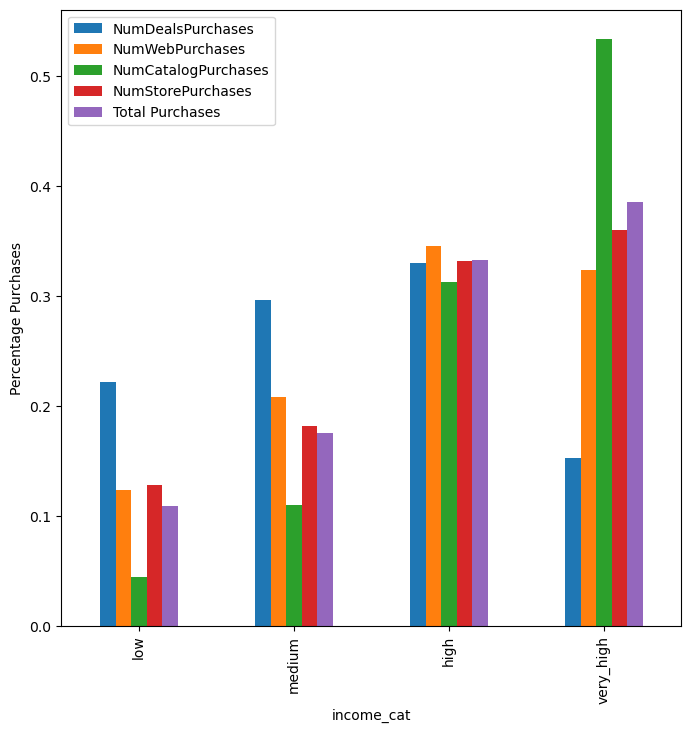

In [82]:
group=df.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

- The percent of catalog purchase is very high for customers with a higher income followed by store purchases
- The percent of web purchases is highest amongst customers with a high income percent store purchase is roughly just as high
- The percent of discount purchase is highest amongst customers with a medium income, followed by web purchases with catalog being the least
- The percent of discount purchase is highest amongst customers with a low income, followed by store purchases with catalog being the least

We can also visualize the correlation by purchases from different channels and income of the customer.

### Correlation matrix for the columns mentioned below 

<AxesSubplot:>

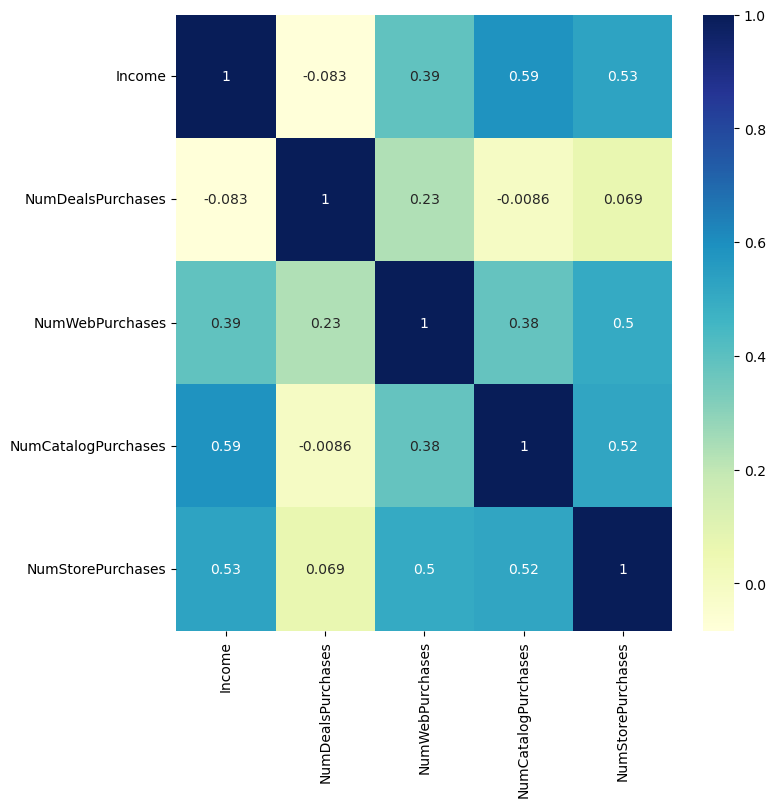

In [83]:
corr=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot = True, cmap='YlGnBu')

- Income, store purchases and catalog purchases show a positive relationship
- Discount purchases have a negative correlation with income and catalog purchases
- Web purchases have a positive relationship with store purchases. Customers who buy online are most likely to visit the stores in person
- Catalog purchases have a positive relationship with income and store purchases, a negative relationship with discount purchases

**Observations:____**

As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [87]:
df3 = df[df.Income > 52000]
df4 = df3[df3.MntWines > df3.MntWines.mean()]
new_profile = df4[df4['Total Children'] == 0]
new_profile.shape

(259, 33)

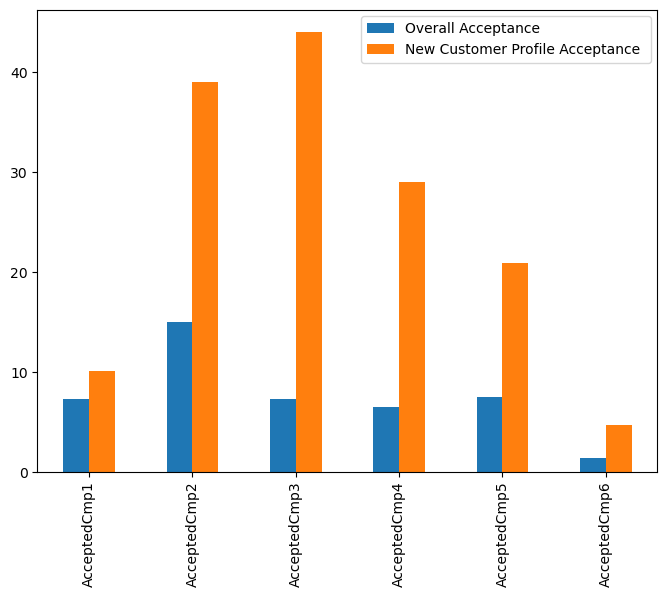

In [88]:
#Calculating success rate of each campaing for both segments 
success_campaign = (df[cam_columns].sum()/df.shape[0]) * 100 #success rate of all campaigns
success_campaign3 = pd.DataFrame(success_campaign, columns = ['Overall Acceptance'])

success_campaign4 = pd.DataFrame((new_profile[cam_columns].sum()/new_profile.shape[0])*100, 
                                 columns=['New Customer Profile Acceptance ']) #success rate for the
                                                                               #augmented profile

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicates that acceptance rate would have been high for new customer profile i.e. income greater than the mean income, no kid at home, amount spent of wines is greater than the mean amount spent on wines.

### Conclusions and recommendations for the CMO to help make the next marketing campaign strategy.

## Conclusion and Recommendations

### Conclusion
- On average the campaigns appear to be more successful among customers who have a higher income and no children
- The campaigns also found more acceptance in countries like Spain and Canada, probably due to a higher store presence in these locations
- The most popular products among customers are wine and meat products with fruits and sweets being the least popular
- The average purchase made via web across all campaigns is quite low
- We observed a high acceptance rate amongst customers who recently purchased an item (this is especially the case for the most successful campaign, campaign 2)
- Discounts have the most significant effect amongst customers with a low and medium range income

## Recommendations
- Discounts should be targeted to customers with lower incomes 
- Campaigns would find more success amongst single customers with no children who spend more frequently on wine
- Countries with more store presence like Spain and Canada are likely to have a higher acceptance rate 
- Campaigns should focus on products that are popular amongst customers such as wine and meat 
- Targeted campaigns amongst customers with low recency is likely to find more acceptance
- The website should optimized to increase web purchases.